# Modelo mixto

In [1]:
datos <- read.csv('/home/lorena/Escritorio/Estadistica aplicada y R/Literatura/Modelo mixto/modelo mixto operador-teñido.csv')

In [3]:
library(GAD)

Loading required package: matrixStats

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.



Extraemos de nuestros datos los factores y la variable respuesta. Además, definimos cuáles factores son fijos y cuáles aleatorios.

In [6]:
duracion <- as.factor(datos$duracion)
duracion <- as.fixed(datos$duracion)
temperatura <- as.factor(datos$temperatura)
temperatura <- as.fixed(datos$temperatura)
operador <- as.factor(datos$operador)
operador <- as.random(datos$operador)

In [5]:
y <- datos$teñido

## ANOVA 

In [7]:
m1 <- lm(y~ duracion*temperatura*operador)

In [8]:
gad(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
duracion,2,436.00000,218.000000,2.451734,2.018374e-01
temperatura,1,50.07407,50.074074,8.894737,9.643754e-02
operador,2,261.33333,130.666667,39.864407,7.438716e-10
duracion:temperatura,2,78.81481,39.407407,3.412991,1.365166e-01
duracion:operador,4,355.66667,88.916667,27.127119,1.982473e-10
temperatura:operador,2,11.25926,5.629630,1.717514,1.938948e-01
duracion:temperatura:operador,4,46.18519,11.546296,3.522599,1.587012e-02
Residual,36,118.00000,3.277778,NA,NA


Se observa que hay diferencias significativas en la interacción duración-temperatura-operador.

## Calculando las estimaciones de los componentes de varianza 

In [9]:
library(Matrix)
library(lme4)

In [35]:
m2 <- lmer(y~ duracion*temperatura + (1|operador ) + (1|duracion:operador)+(1|temperatura:operador)+(1|duracion:temperatura:operador))

boundary (singular) fit: see ?isSingular



In [14]:
summary(m2)

Linear mixed model fit by REML ['lmerMod']
Formula: 
y ~ duracion * temperatura + (1 | operador) + (1 | duracion:operador) +  
    (1 | temperatura:operador) + (1 | duracion:temperatura:operador)

REML criterion at convergence: 233.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.60823 -0.56803  0.08979  0.62342  1.58085 

Random effects:
 Groups                        Name        Variance Std.Dev.
 duracion:temperatura:operador (Intercept)  2.099   1.449   
 duracion:operador             (Intercept) 13.224   3.636   
 temperatura:operador          (Intercept)  0.000   0.000   
 operador                      (Intercept)  2.319   1.523   
 Residual                                   3.278   1.810   
Number of obs: 54, groups:  
duracion:temperatura:operador, 18; duracion:operador, 9; temperatura:operador, 6; operador, 3

Fixed effects:
                          Estimate Std. Error t value
(Intercept)                 27.222      2.499  10.893
duracion50              

In [15]:
summary(m2)$varcor

 Groups                        Name        Std.Dev.
 duracion:temperatura:operador (Intercept) 1.4487  
 duracion:operador             (Intercept) 3.6365  
 temperatura:operador          (Intercept) 0.0000  
 operador                      (Intercept) 1.5230  
 Residual                                  1.8105  

De acuerdo a la desviación estándar, la interacción duración-operador es la que tiene mayor variación.

## Calculando el porcentaje de varianza total de cada componente

In [17]:
vars <- c(2.099,13.224,2.319,3.278)
porcentajes<-round(100*vars/sum(vars),2)
porcentajes

[1] 10.03 63.21 11.09 15.67

## Gráfica de pastel 

In [19]:
library(plotrix)

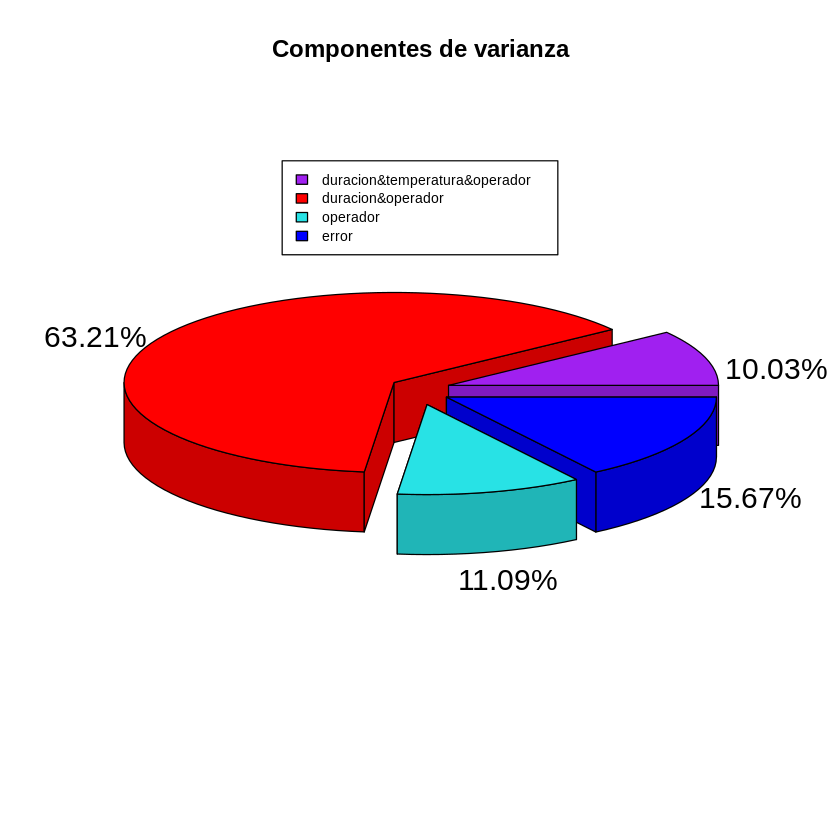

In [26]:
etiqueta<-paste(porcentajes,"%",sep = "")
colores<-c("purple","red","541","blue")
pie3D(porcentajes,radius=0.9,explode=0.1,main="Componentes de varianza",col=colores, labels = etiqueta)

#Leyenda
legend("top", inset = 0.1,c("duracion&temperatura&operador","duracion&operador","operador","error"),cex=0.7,fill=colores)

## Verificando los supuestos

In [28]:
residuos<- m1$res
estimados<- m1$fitted.values

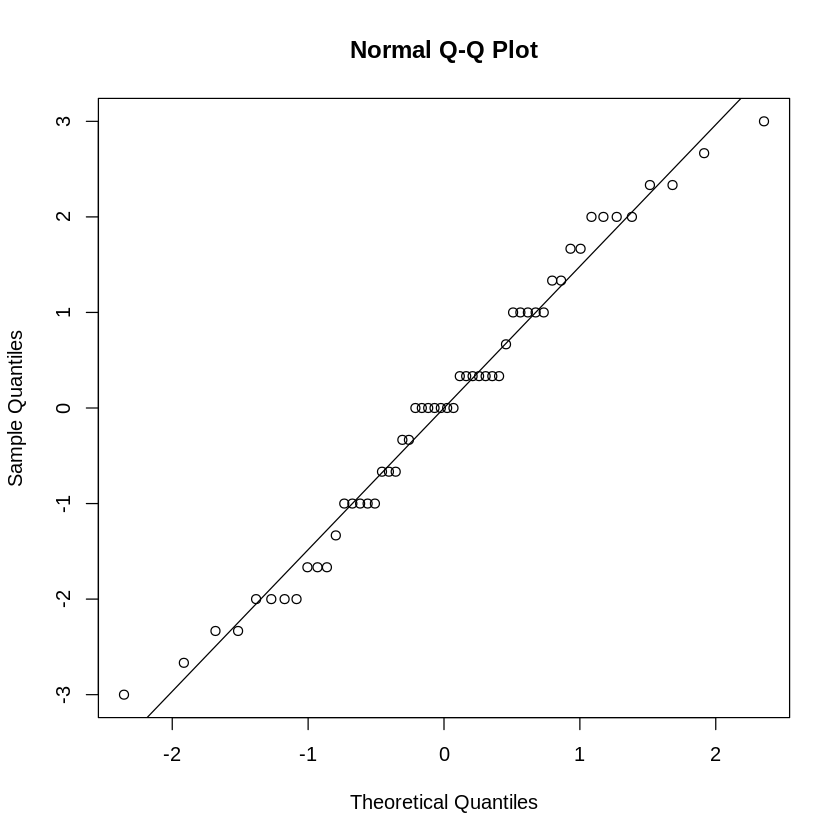

In [29]:
qqnorm(residuos)
qqline(residuos)

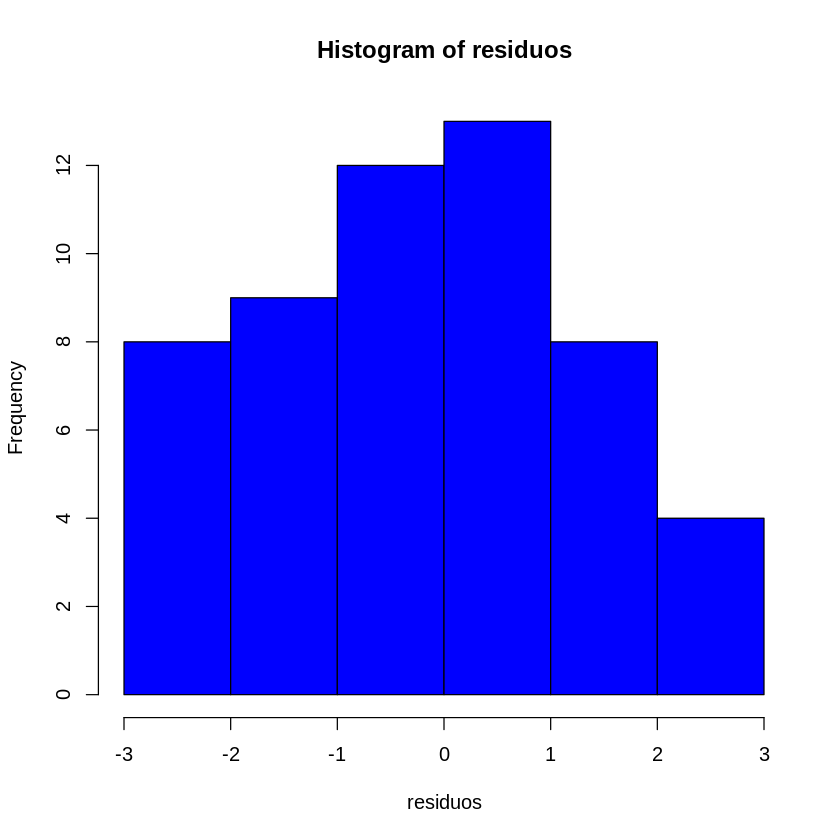

In [30]:
hist(residuos,col="blue")

In [31]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.97742, p-value = 0.3978


No se rechaza $H_0$, por lo que los residuos sí tienen una distribución normal.

In [32]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [33]:
runs.test(as.factor(m1$residual>0))


	Runs Test

data:  as.factor(m1$residual > 0)
Standard Normal = 0.31725, p-value = 0.7511
alternative hypothesis: two.sided


De acuerdo a la prueba de rachas, los residuos no tienen correlación.